# Comparison across different learning setups
We had trained models that can predict gene expression from various feature types, eg. static, dynamic, epigenetic...
In this notebook I'm going to load all those models and compare them in one place.

## Load the models for static, dynamic, and epigenetic (HepG2 DNase-seq) features

In [1]:
load("sc_iPCS_TGGLasso_all_models.RData")
df_all <- df

## Load the models for epigenetic (PHH and HLC samples, ATAC-seq) features

In [2]:
load("ATAC/sc_iPC_TGGLasso_ATAC_models.RData")
df_atac <- df

In [3]:
head(df_atac)

val,feature,imputation_status,cor_method,data_partition
0.2938419,HLCR2,imputed,Pearson,test
0.2802259,HLCR2,imputed,Pearson,test
0.2906240,HLCR2,imputed,Pearson,test
0.3018952,HLCR2,imputed,Pearson,test
0.3016686,HLCR2,imputed,Pearson,test
0.2948860,HLCR2,imputed,Pearson,test


In [4]:
head(df_all)

val,feature,imputation_status,cor_method,data_partition
0.4058099,dynamic,imputed,Pearson,test
0.4125152,dynamic,imputed,Pearson,test
0.4023380,dynamic,imputed,Pearson,test
0.4217069,dynamic,imputed,Pearson,test
0.3952114,dynamic,imputed,Pearson,test
0.4039255,dynamic,imputed,Pearson,test


In [5]:
df_test <- rbind(subset(df_all, data_partition == "test"), subset(df_atac, data_partition == "test"))

Warning message:
“Removed 84 rows containing non-finite values (stat_ydensity).”

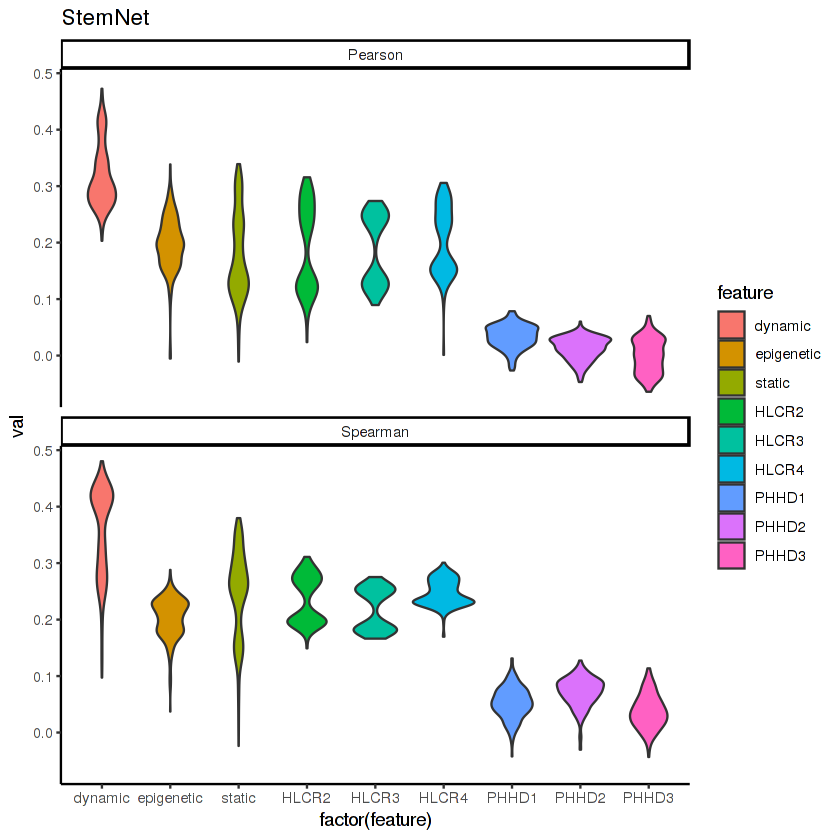

In [6]:
library(ggplot2)
ggplot(df_test, aes(factor(feature), val)) + 
geom_violin(aes(fill= feature)) + 
ggtitle("StemNet") + facet_wrap("cor_method", ncol= 1) + 
theme_classic()

## Visualize the feature heatmaps derived from the MTL models

### extract the cell types (keeping the replicate (batch) information in the name)

In [8]:
cell.types <- sapply(seq(ncol(dyn_imp_TGL_model$B)), function(i){
    tokens <- strsplit(colnames(dyn_imp_TGL_model$B)[i], "_")[[1]]
    ## The naming scheme was very inconsistent, therefore this if case is required
    if(tokens[1] == "HLC"){
        name <- paste(tokens[1], tail(tokens, n= 1), sep= "_")
    }else{
        name <- paste(tokens[1], tokens[3], sep= "_")
    }
    })

In [9]:
## Load the heatmap library
library(pheatmap)

## Make the column annotation dataframe for the pheatmap function
ann_col <- data.frame(cell_types= cell.types)
rownames(ann_col) <- colnames(dyn_imp_TGL_model$B)

In [10]:
set.seed(0)
library(pheatmap)

paletteLength <- 50
myColor <- colorRampPalette(c("blue", "white", "red"))(paletteLength)

plot_coef <- function(beta, feature_name, threshold){
    top_TFs <- which(rowSums(abs(beta)) > threshold)
    print(length(top_TFs))

    myBreaks <- c(seq(min(beta), 0, length.out= ceiling(paletteLength/2) + 1), 
        seq(max(beta)/paletteLength, max(beta), length.out= floor(paletteLength/2)))

    pheatmap(beta[top_TFs, ], main= feature_name, color= myColor, 
             breaks= myBreaks, fontsize_row= 6, annotation_col= ann_col, labels_col= "")
}

[1] 55


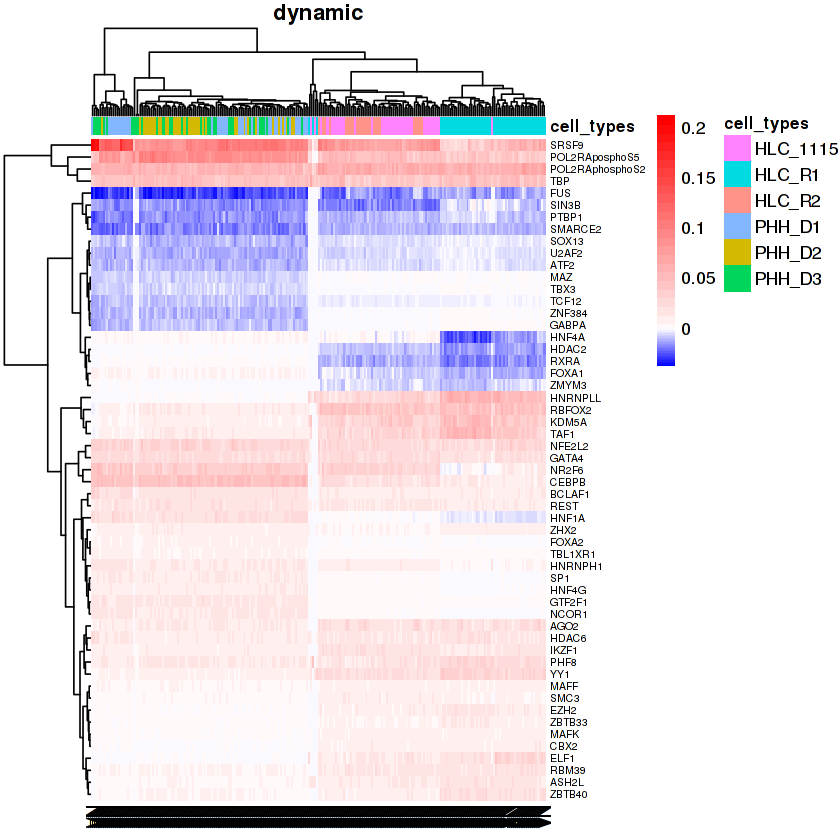

In [11]:
beta <- dyn_imp_TGL_model$B
plot_coef(beta, "dynamic", .6)

[1] 50


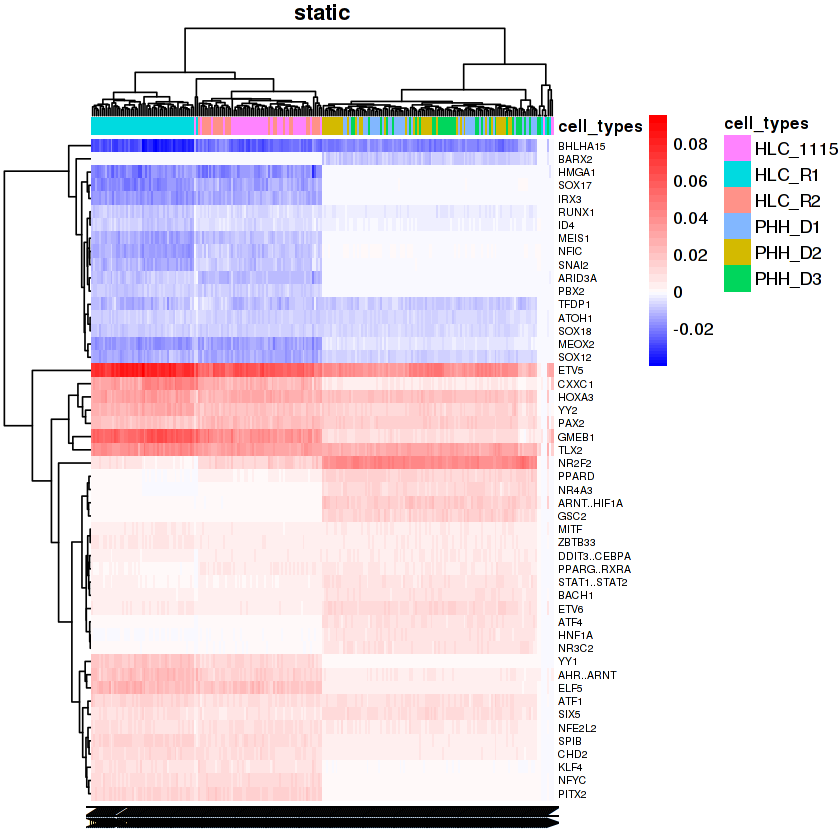

In [12]:
beta <- sta_imp_TGL_model$B
plot_coef(beta, "static", .8)

[1] 25


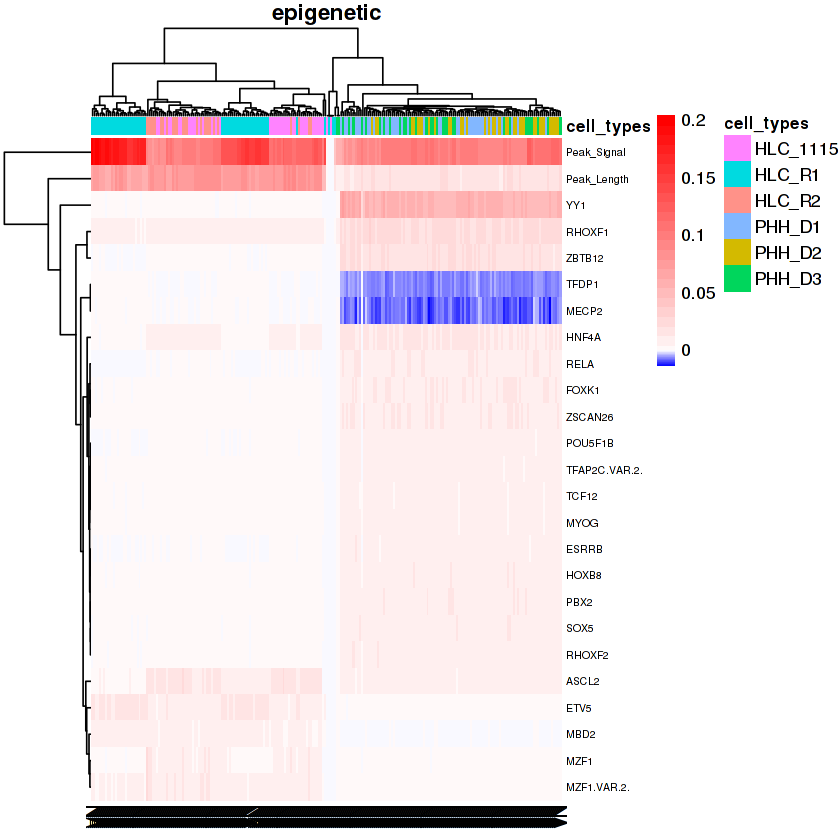

In [13]:
beta <- epi_imp_TGL_model$B
plot_coef(beta, "epigenetic", .6)

[1] 17


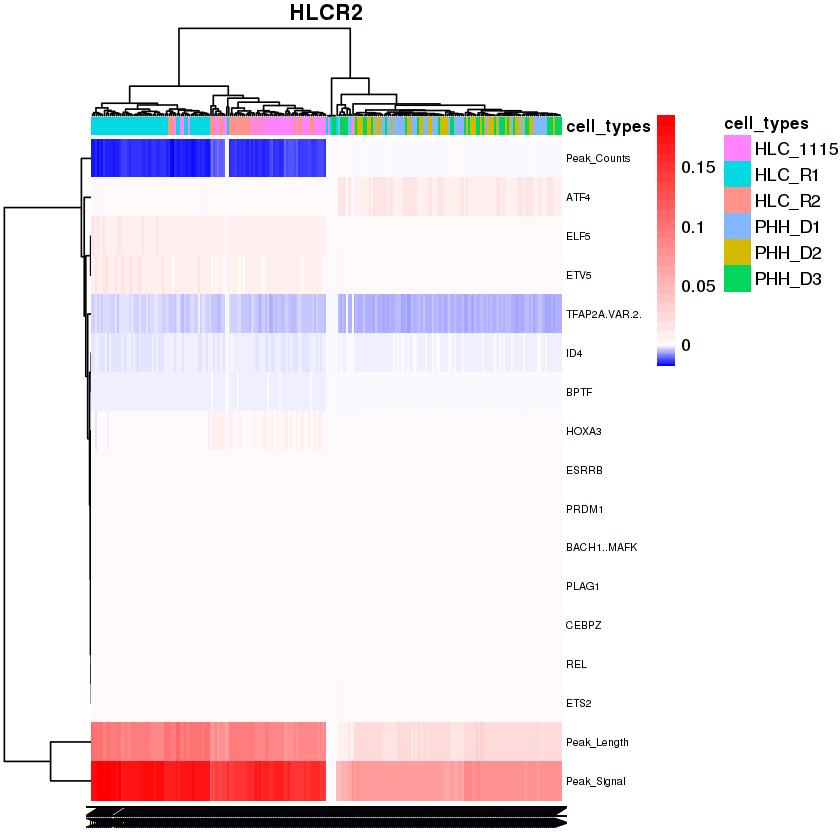

In [14]:
beta <- HLCR2_model$B
colnames(beta) <- colnames(dyn_imp_TGL_model$B)
plot_coef(beta, "HLCR2", .06)

[1] 5


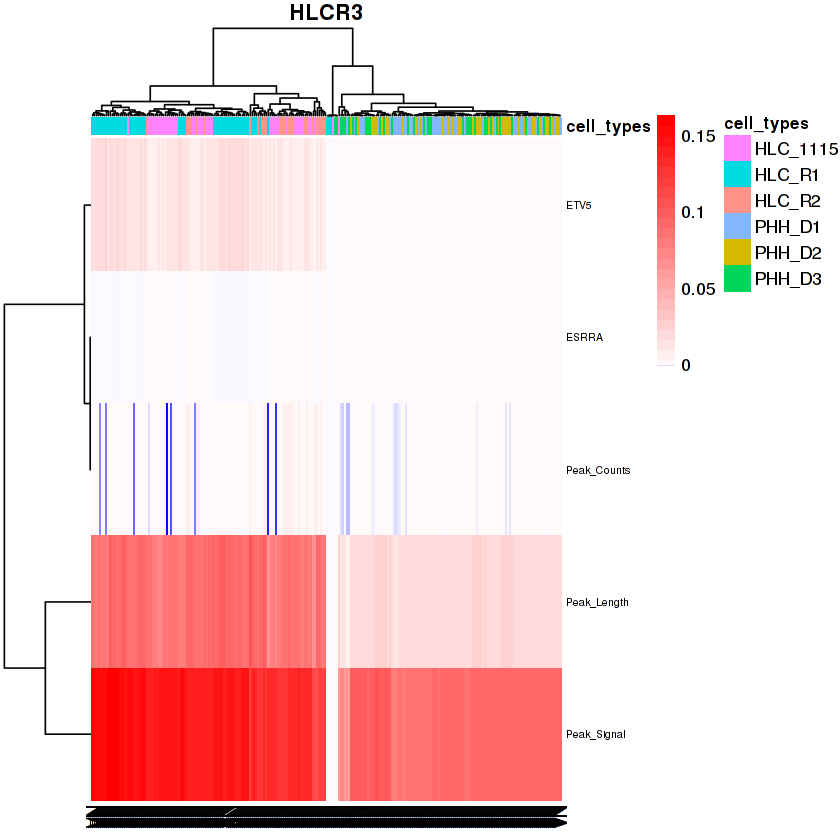

In [15]:
beta <- HLCR3_model$B
colnames(beta) <- colnames(dyn_imp_TGL_model$B)
plot_coef(beta, "HLCR3", .06)

[1] 10


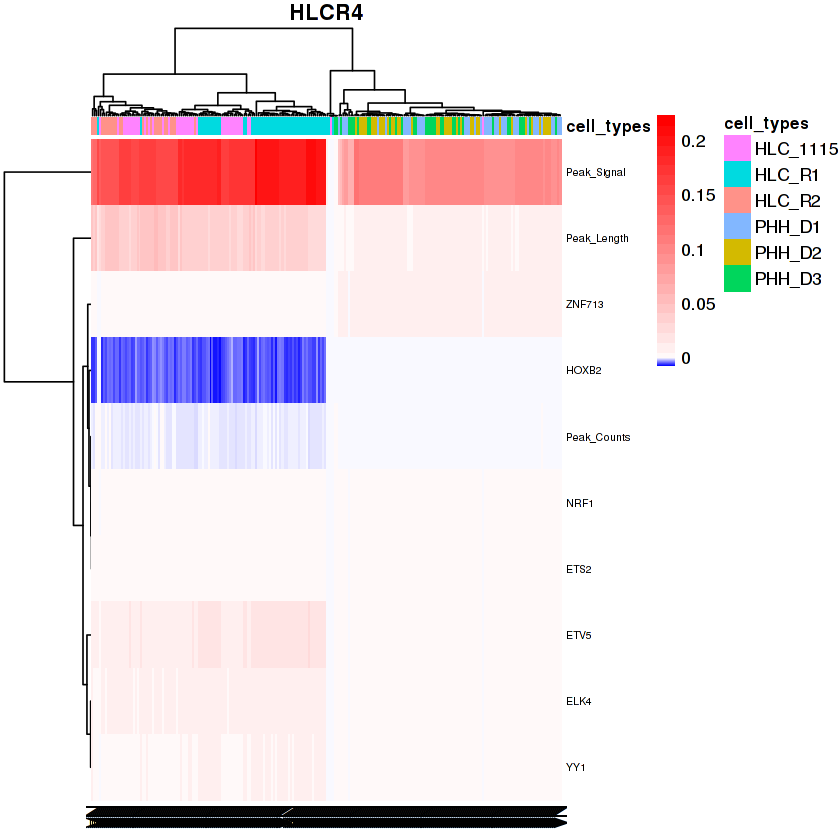

In [16]:
beta <- HLCR4_model$B
colnames(beta) <- colnames(dyn_imp_TGL_model$B)
plot_coef(beta, "HLCR4", .06)

[1] 25


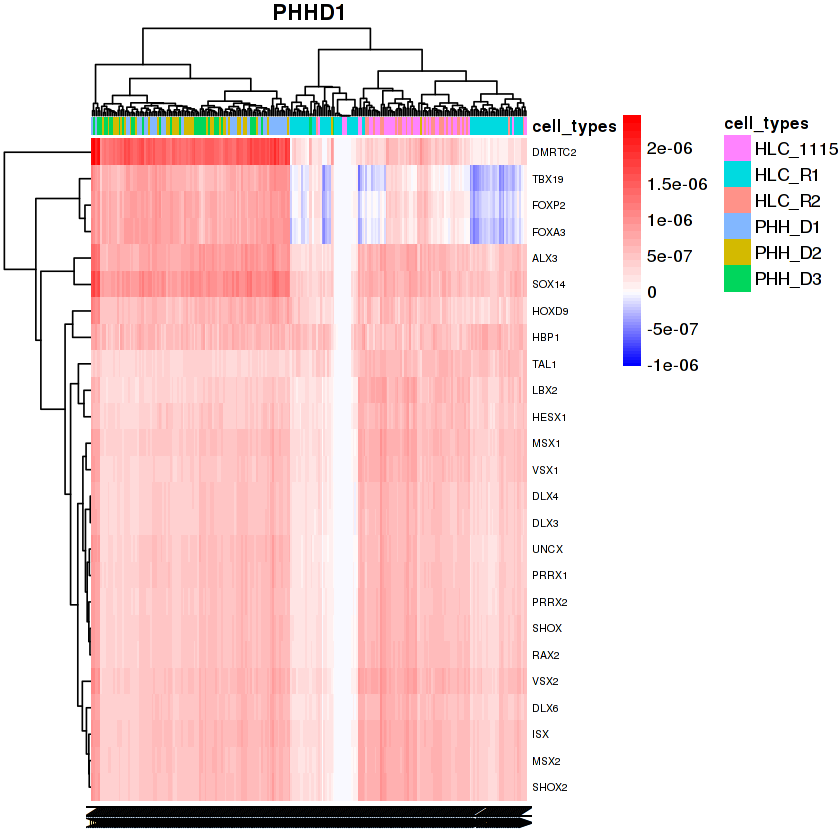

In [17]:
beta <- PHHD1_model$B
colnames(beta) <- colnames(dyn_imp_TGL_model$B)
plot_coef(beta, "PHHD1", .0001)

[1] 8


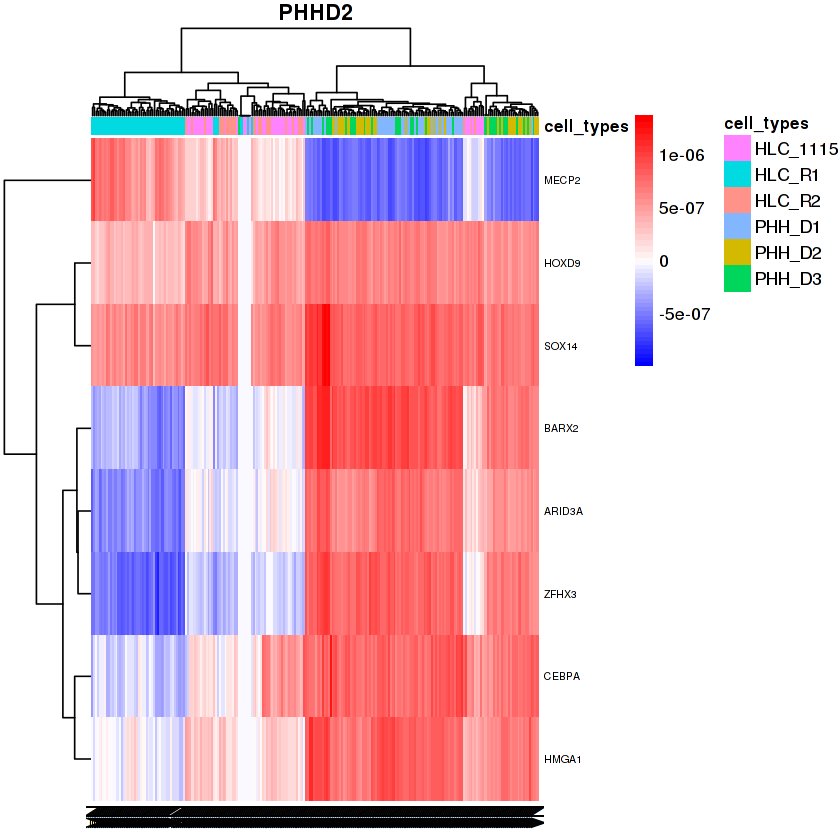

In [18]:
beta <- PHHD2_model$B
colnames(beta) <- colnames(dyn_imp_TGL_model$B)
plot_coef(beta, "PHHD2", .0001)

[1] 12


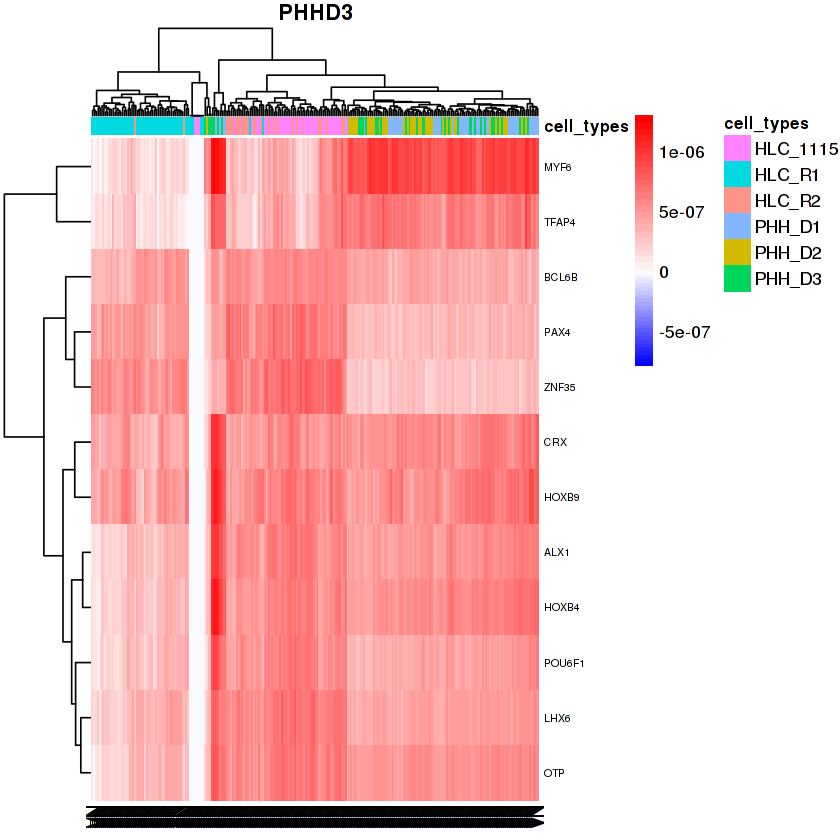

In [19]:
beta <- PHHD3_model$B
colnames(beta) <- colnames(dyn_imp_TGL_model$B)
plot_coef(beta, "PHHD3", .0001)